In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn; sn.set()

In [5]:
plt.rcParams['figure.figsize']= (10,8)

In [6]:
df = pd.read_csv("./train.csv")
df.shape

(891, 12)

In [7]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df2 = df.drop(["Ticket", "Cabin", "PassengerId", "Name"], axis=1)

In [13]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [14]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## imputation

These may be missing values:

In [15]:
df.Fare[df.Fare==0]

179    0
263    0
271    0
277    0
302    0
413    0
466    0
481    0
597    0
633    0
674    0
732    0
806    0
815    0
822    0
Name: Fare, dtype: float64

In [16]:
med = df2.dropna().median()

In [17]:
df2 = df2.fillna(med)

a better imputation could be done by considering the median age per group (sex, class)

In [18]:
df2 = df2.dropna(axis=0)
df2.shape

(889, 8)

In [19]:
feat = pd.get_dummies(df2.ix[:,1:], columns=["Sex","Embarked"])
feat.head().T

,0,1,2,3,4
Pclass,3.00,1.0000,3.000,1.0,3.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00


Not an unbalanced problem:

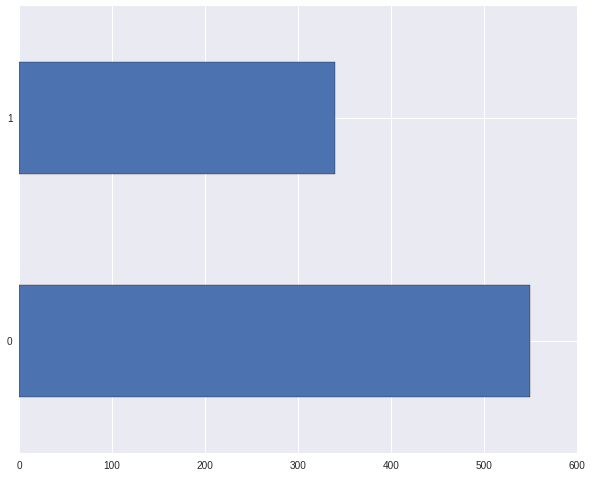

In [20]:
_ = df2.Survived.value_counts().plot(kind='barh')

In [21]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform as sp_rand
from scipy.stats import randint as sp_randint
from xgboost import XGBClassifier

In [22]:
X = feat.values
y = df2.Survived.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=1)

In [23]:
lr = LogisticRegression()
#lrp = make_pipeline(StandardScaler(), lr)
#ypred = lrp.fit(Xtrain, ytrain).predict(Xtest)
ypred = lr.fit(Xtrain, ytrain).predict(Xtest)
accuracy_score(ytest, ypred)

0.8314606741573034

In [24]:
lr.score(Xtrain,ytrain),\
lr.score(Xtest,ytest)

(0.79606188466947958, 0.8314606741573034)

In [25]:
roc_auc_score(ytest, ypred)

0.82583170254403138

In [27]:
scores = cross_val_score(lr, X,y,cv=5, scoring="accuracy")
scores

array([ 0.78089888,  0.79213483,  0.78089888,  0.76966292,  0.82485876])

In [29]:
scores.mean()

0.78969085253602489

In [30]:
def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")


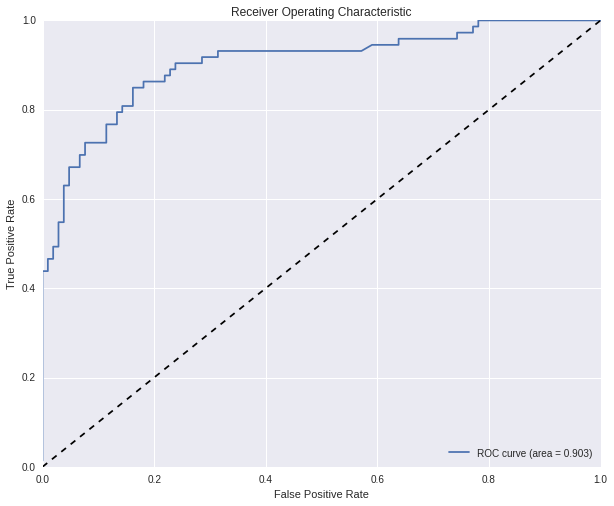

In [31]:
plot_roc_curve(ytest, lr.predict_proba(Xtest))

In [32]:
rf = RandomForestClassifier()
ypred = rf.fit(Xtrain, ytrain).predict(Xtest)
accuracy_score(ytest,ypred),\
roc_auc_score(ytest, ypred)

(0.8370786516853933, 0.8222439660795825)

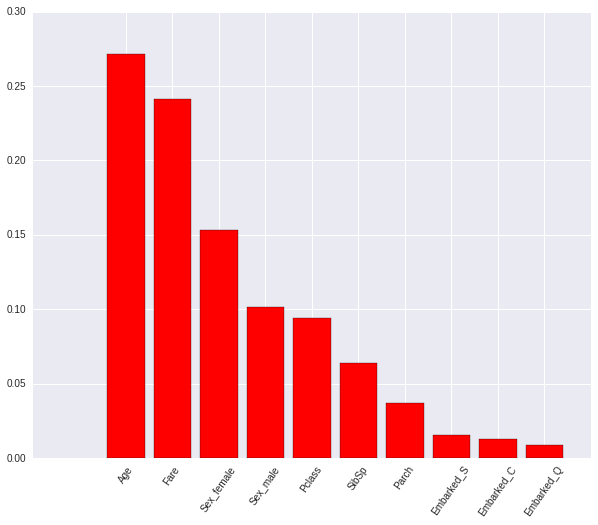

In [33]:
importances = rf.feature_importances_
std = np.std([x.feature_importances_ for x in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
rf_list = feat.columns[indices].tolist()[:20]
rf_ind = indices[:10]
_ = plt.bar(range(10), importances[indices[:10]], color="r", align="center")
_ = plt.xticks(range(10), feat.columns[indices], rotation=55)

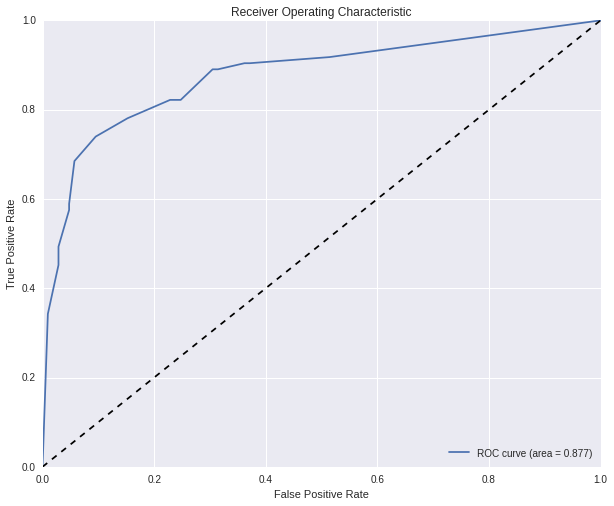

In [35]:
plot_roc_curve(ytest, rf.predict_proba(Xtest))

In [36]:
gb = GradientBoostingClassifier()
ypred = gb.fit(Xtrain, ytrain).predict(Xtest)
accuracy_score(ytest,ypred),\
roc_auc_score(ytest, ypred)

(0.8314606741573034, 0.80704500978473581)

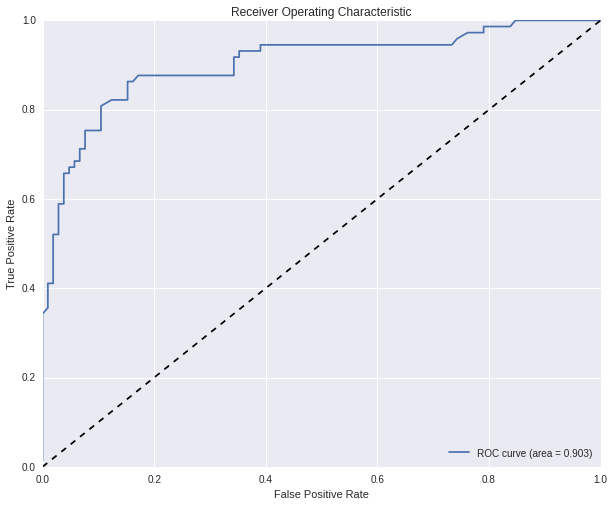

In [37]:
plot_roc_curve(ytest, gb.predict_proba(Xtest))

hyperparameter tuning: 

In [38]:
params = { "n_estimators": [50, 100, 500],
           "max_features": ['auto','sqrt'],
           "max_depth": [5, 10, 20] }
rf = RandomForestClassifier()
grid = GridSearchCV(rf, params)
grid.fit(Xtrain,ytrain)
grid.best_score_
grid.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}

3-fold crossvalidated score:

In [39]:
grid.best_score_

0.81575246132208157

In [40]:
gb = GradientBoostingClassifier()
params = {'n_estimators': sp_randint(50,500),
		  'max_depth':sp_randint(3,12),
		  'learning_rate': sp_rand(0.001,1)
		 }
grid = RandomizedSearchCV(gb, params, n_iter=50)
grid.fit(Xtrain,ytrain)
grid.best_score_

0.81575246132208157

In [41]:
grid.best_params_

{'learning_rate': 0.027273158723793434, 'max_depth': 6, 'n_estimators': 58}

In [43]:
xgb = XGBClassifier(n_estimators=58, learning_rate=0.27, max_depth=6)
scores = cross_val_score(xgb, X,y, cv=5)
scores

array([ 0.79213483,  0.8258427 ,  0.84831461,  0.79775281,  0.85310734])

In [44]:
scores.mean()

0.82343045769059864

## feature creation
For instance the title in the name field.

Classification improvement by stacking logistic regression and GBM